___
# <font color= #003366> **Proyecto Final** </font>
### **Análisis Estadístico Multivariable – Primavera 2025**
___

<p>Priscila Cervantes Ramírez  750722
<p>Monica Ibarra Herrera  750601


<div style="display: flex; align-items: center;">
    <div style="flex: 1;">
        <img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-Gris.png" width="300">


### <font color=  #c9d996> **Introducción**</font>

### <font color=  #c9d996> **Objetivo**</font>

### <font color=  #c9d996> **Descripción del conjunto de datos**</font>

- **instant**: El index
- **dteday**: Fecha
- **season**: Estación del año (1:invierno, 2:primavera, 3:verano, 4:otoño)
- **yr**: Año (0: 2011, 1: 2012)
- **mnth**: Mes (1 a 12)
- **hr**: Hora (0 a 23)
- **holiday**: Si es día festivo o no
- **weekday**: Día de la semana
- **workingday**: Si no es fin de semana o día festivo 1, de lo contrario 0
- **weathersit**: 1: Despejado, 2: Pocas nubes, 3: Parcialmente nublado, 4:Parcialmente nublado
- **temp**: Temperatura normalizada en grados Celsius. Los valores se derivan de (t-t_mín)/(t_máx-t_mín), t_mín = -8, t_máx = +39 (solo en escala horaria).
- **atemp**: Sensación de tempertaura, temperatura normalizada en grados Celsius. Los valores se derivan de (t-t_mín)/(t_máx-t_mín), t_mín = -16, t_máx = +50 (solo en escala horaria).
- **hum**: Humedad normalizada. Los valores se dividen hasta 100 (máximo).
- **windspeed**: Velocidad del viento normalizada. Los valores se dividen en 67 (máximo).
- **casual**: Número de usuarios casuales
- **registered**: Número de usuarios registrados
- **cnt**: Número total de bicicletas rentadas incluyendo a usuarios regsitrados y casuales

### <font color=  #c9d996> **Regresión lineal**</font>

#### <font color= #96d9cf> **Preprocesamiento de datos**</font>

In [128]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from scipy import stats
from statsmodels.compat import lzip
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pingouin as pg

In [83]:
# Cargar los datos
df = pd.read_csv('medical_cost.csv')
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [84]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


Como podemos observar, no hay datos nulos en el dataset.

In [85]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [86]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [87]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [88]:
# Codificación de variables numéricas
df = pd.get_dummies(df, drop_first=True, dtype=int)
df

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,16884.92400,0,1,0,0,1
1,2,18,33.770,1,1725.55230,1,0,0,1,0
2,3,28,33.000,3,4449.46200,1,0,0,1,0
3,4,33,22.705,0,21984.47061,1,0,1,0,0
4,5,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,1334,50,30.970,3,10600.54830,1,0,1,0,0
1334,1335,18,31.920,0,2205.98080,0,0,0,0,0
1335,1336,18,36.850,0,1629.83350,0,0,0,1,0
1336,1337,21,25.800,0,2007.94500,0,0,0,0,1


##### <font color= #d4b1e6> **Análisis Exploratorio Descriptivo** </font>

In [89]:
df.describe()

,Id,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,386.391641,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,1.000000,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,335.250000,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,669.500000,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,1338.000000,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'sex_male'}>],
       [<Axes: title={'center': 'smoker_yes'}>,
        <Axes: title={'center': 'region_northwest'}>,
        <Axes: title={'center': 'region_southeast'}>],
       [<Axes: title={'center': 'region_southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

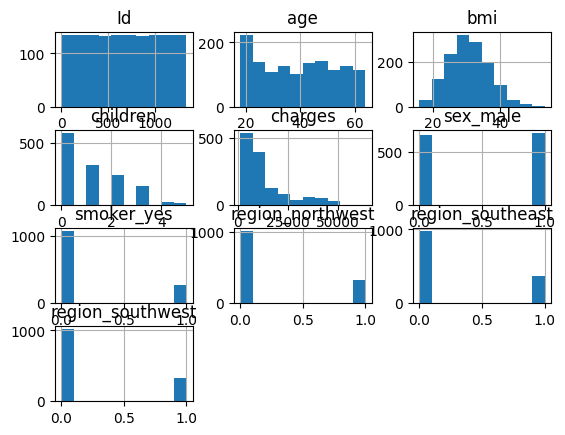

In [90]:
df.hist()

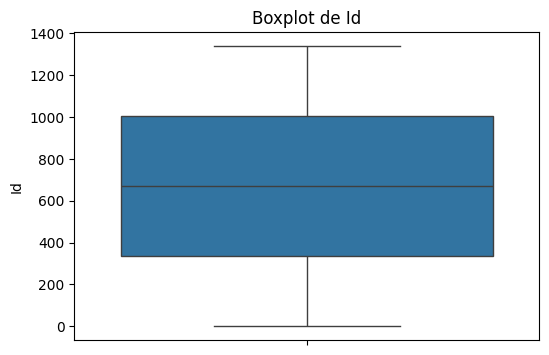

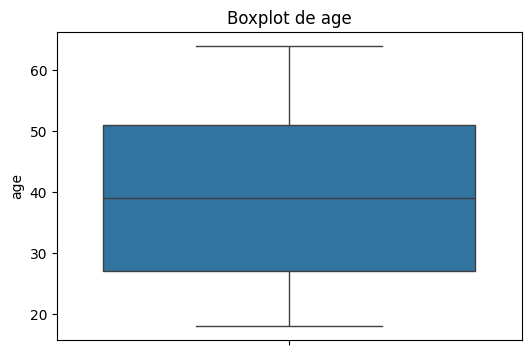

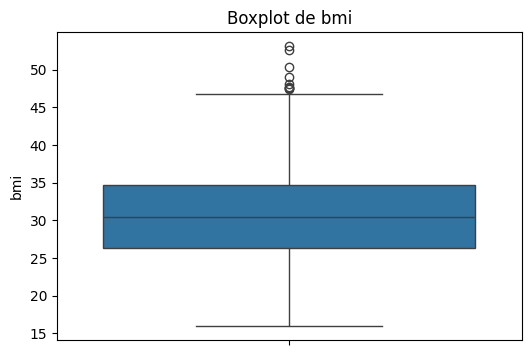

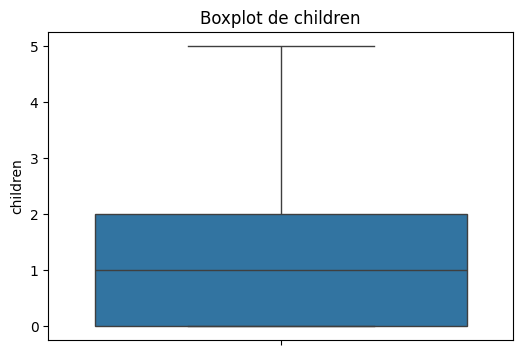

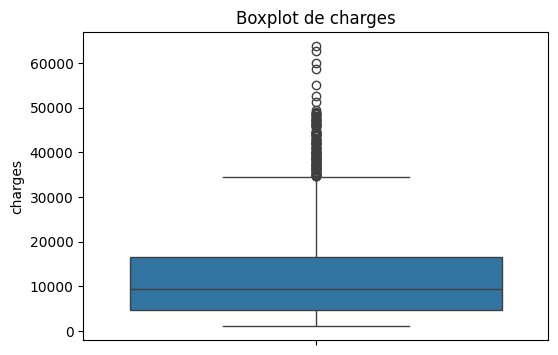

In [91]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

<Axes: ylabel='smoker_yes'>

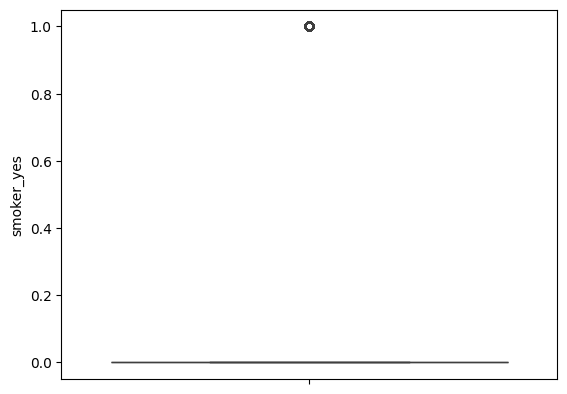

In [92]:
sns.boxplot(df['smoker_yes'])

<Axes: ylabel='region_northwest'>

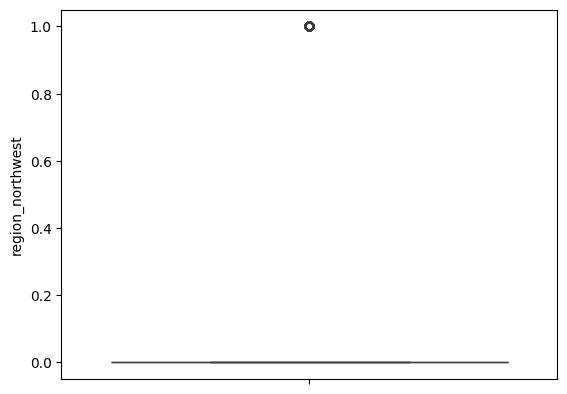

In [93]:
sns.boxplot(df['region_northwest'])

<Axes: ylabel='region_southwest'>

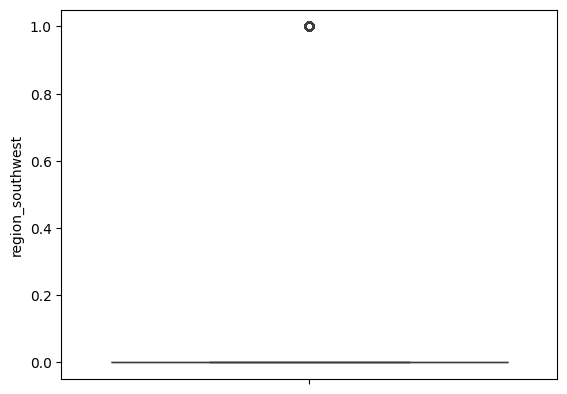

In [94]:
sns.boxplot(df['region_southwest'])

<Axes: >

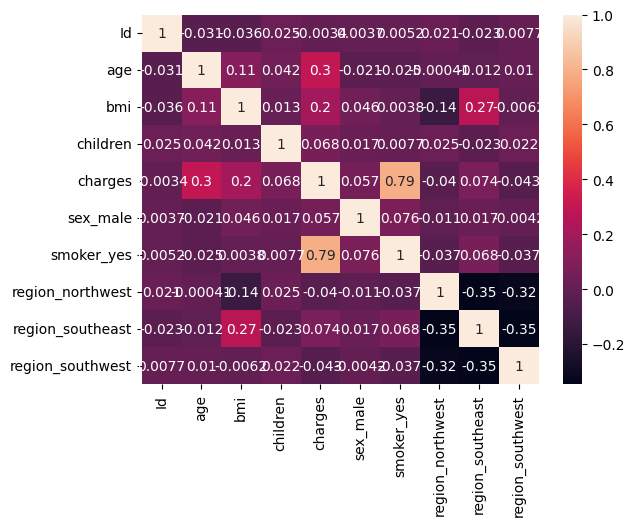

In [95]:
# Matriz de correlación
sns.heatmap(df.corr(), annot=True)

Analizando la matriz de correlación, las variables de smoker, bmi y edad son las variables que más correlación tienen con la variable objetivo, en este caso los cargos de los gastos médicos, por lo que esas variables serán utilizadas para crear el modelo de regresión lineal múltple.

#### <font color= #d4b1e6> **Modelado** </font>

##### <font color= #FFD8A8> **Modelo 1: Regresión lineal múltiple** </font>

##### <font color= #96d9cf> **Regresión Lineal Scikit-Learn**</font>

In [96]:
# Variable independiente
X = df[['smoker_yes', 'age', 'bmi', 'children']]
# Variable dependiente
y = df['charges']

In [97]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [98]:
# Modelo de regresión lineal
reg_lineal = linear_model.LinearRegression()
modelo1 = reg_lineal.fit(X_train, y_train)
y_pred = reg_lineal.predict(X_test)

In [99]:
# Datos de la regresión lineal
print('Coeficiente: ', reg_lineal.coef_)
print('Intercepto: ', reg_lineal.intercept_)
r2 = reg_lineal.score(X_test, y_test)

Coeficiente:  [23653.21164629   257.07115795   327.52263109   427.19997095]
Intercepto:  -12117.0750741077


##### <font color= #96d9cf> **Regresión Lineal Statsmodel**</font>

In [100]:
# Agregar una constante para el término independiente (B0)
X_train = sm.add_constant(X_train)
modelo = sm.OLS(y_train, X_train).fit()

print(modelo.summary())

# Predicciones en los datos de prueba
X_test = sm.add_constant(X_test)
Y_pred = modelo.predict(X_test)

print("Predicciones en los datos de prueba:")
print(Y_pred)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     762.1
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          1.26e-310
Time:                        11:20:59   Log-Likelihood:                -10847.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1065   BIC:                         2.173e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.212e+04   1068.509    -11.340      0.0

##### <font color= #d4b1e6> **Validación y Análisis de criterios** </font>

- Según el modelo de statsmodel tenemos un coeficiente de determinación de 0.741, lo que indica que el modelo **explica el 74.1% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente, el índice de masa corporal, el número de niños o dependientes cubiertos por el seguro médico y si el paciente fuma. Es un buen coeficiente de determinación ya que más cercano a 1 significa que el modelo es capaz de explicar mejor la variabilidad de los datos.

- El Criterio de Akaike (AIC) es de **2.17e^4**, el cual compararemos más adelante con los distintos modelos que se plantearán.

- El Criterio de Información Bayesiano (BIC) es de **2.173e^5** que de igual manera que el AIC será comparado más adelante con los otros modelos.

- El p-value t es de 0 para todas las variables, excepto para la variable del número de niños cubiertos por el seguro la cual tiene un p-value t de 0.006 por lo tanto el coeficiente individual de todas las variables independientes, sí aportan **significancia** y tienen un impacto significativo en la variable dependiente, en este caso costo médico.

- El p.value de F-Statistic es **1.26e^-310**, el cual es prácticamente 0, lo que indica que los coeficientes en conjunto del modelo **sí son significativos**.

- El Prob Jarque-Bera Prob(JB) nos indica si los residuos son normales, en este caso fue de 2.55e^-135, el cual es prácticamente 0, lo que nos indica que los errores **no se distribuyen normalmente**. De igual manera el parámetro de Omnibus Prob(Omnibus) es de 0, por lo que nos confirma que los residuos **no se distribuyen de manera normal**.

- El parámetro de Durbi-Watson nos indica si hay independencia en los errores, un valor cercano a 2 es preferido. En este caso es de 2.086, el cual nos indica que **sí hay independencia en los errores**, es decir que hay ausencia de autocorrelación.

In [101]:
# Métricas de error para modelo 2 con scikit-learn
error=y_test-y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

MAE: 4213.7986
MSE: 33981653.9502
R2: 0.7811


##### <font color= #d4b1e6> **Verificación de supuestos** </font>

#### <font color= #8FBC8F> **Homocedasticidad**</font>

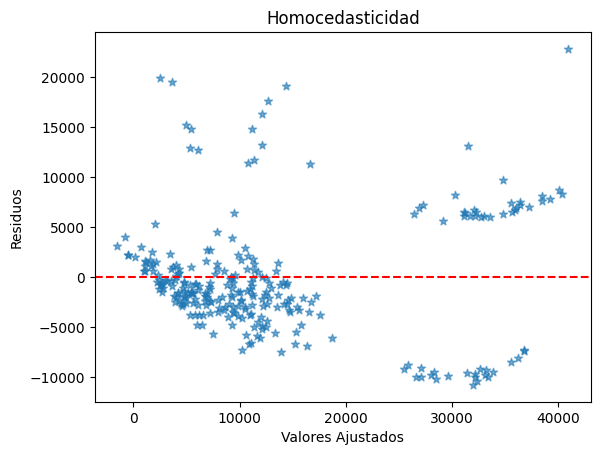

In [102]:
# Visualizar homocedasticidad 
plt.scatter(y_pred, error, marker='*', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

In [103]:
# Forma Estadística de Homocedasticidad
#Breusch-Pagan
#H0: Homocedasticidad (p>0.05)
#H1: No homocedasticidad (p<0.05)
names=['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo.resid, X_train)
lzip(names, test)

[('Lagrange multiplier statistic', 87.93278134000774),
 ('p-value', 3.6184882952062385e-18),
 ('f-value', 23.839613609873197),
 ('f p-value', 6.595296705503492e-19)]

El parámetro de Breusch-Pagan nos indica si hay homocedasticidad, en este caso el p-value es de prácticamente 0 por lo que **no hay homocedasticidad**, es decir hay heterocedasticidad, lo podemos confirmar viendo la gráfica, ya que se ven como una especie de embudo

#### <font color= #8FBC8F> **Normalidad**</font>

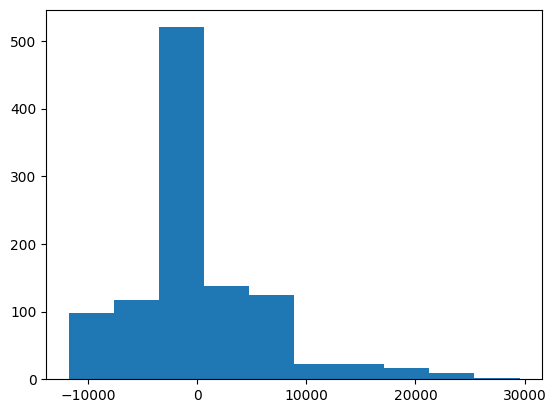

In [104]:
# Forma gráfica de la  normalidad de los residuos
plt.figure()
plt.hist(modelo.resid)
plt.show()

Text(0, 0.5, 'Cuantiles de los Residuos')

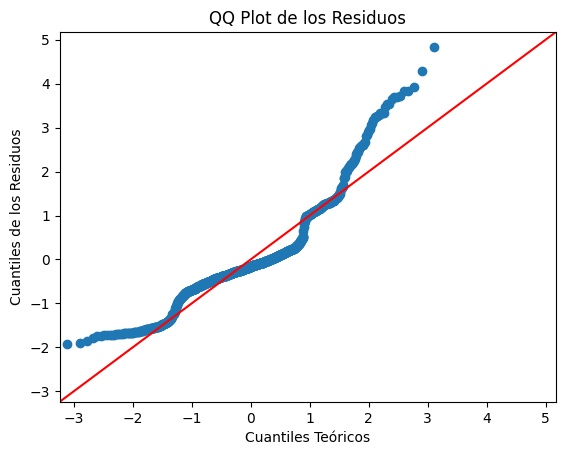

In [105]:
#%% QQ plot

qq_plot = sm.qqplot(modelo.resid, line='45', fit=True)

# Personalizar la apariencia del QQ plot
plt.title("QQ Plot de los Residuos")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de los Residuos")

In [106]:
# Forma estadística de la normalidda (Shapiro-Wilk)
#Ho: Normalidad (p>0.05)
#H1: No normalidad (p<0.05)
names=[' Statistic', 'p-value']
test=stats.shapiro(modelo.resid)
lzip(names,test)

[(' Statistic', 0.8949837361463181), ('p-value', 2.1492108508201836e-26)]

##### <font color= #FFD8A8> **Modelo 2: Regresión lineal múltiple + Feature Selection** </font>

Al modelo original que se hizo anteriormente se agregará feature selection usando el método de envoltura de selección hacia adelante para determinar de manera concreta y correcta cuáles variables le aportan más al modelo.¿ y no sólo basándonos en el análisis de la matriz de correlación como se hizo en el modelo pasado.

##### <font color= #96d9cf> **Regresión Lineal Scikit-Learn**</font>

##### <font color=  #c9d996> **Feature Selection**</font>

In [107]:
#%% 3. Método de Envoltura: Forward Selection (Selección hacia adelante)
X = df.drop(columns='charges')
y = df['charges']

def forward_selection_regression(X, y, significance_level=0.05):
    selected_features = []
    remaining_features = list(X.columns)
    
    while remaining_features:
        pvals = pd.Series(index=remaining_features, dtype=float)
        for feature in remaining_features:
            features_to_test = selected_features + [feature]
            X_with_const = sm.add_constant(X[features_to_test])
            model = sm.OLS(y, X_with_const).fit()
            pvals[feature] = model.pvalues[feature]
        min_pval = pvals.min()
        if min_pval < significance_level:
            best_feature = pvals.idxmin()
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features

In [108]:
selected_forward = forward_selection_regression(X, y, significance_level=0.05)
print("\n[Envoltura - Forward] Variables seleccionadas:", selected_forward)


[Envoltura - Forward] Variables seleccionadas: ['smoker_yes', 'age', 'bmi', 'children']


In [109]:
# Variable independiente
X = df[['smoker_yes', 'age', 'bmi', 'children']]
# Variable dependiente
y = df['charges']

In [110]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [111]:
# Modelo de regresión lineal
reg_lineal2 = linear_model.LinearRegression()
modelo2 = reg_lineal2.fit(X_train, y_train)
y_pred = reg_lineal2.predict(X_test)

In [112]:
# Datos de la regresión lineal
print('Coeficiente: ', reg_lineal2.coef_)
print('Intercepto: ', reg_lineal2.intercept_)
r2 = reg_lineal2.score(X_test, y_test)


Coeficiente:  [23653.21164629   257.07115795   327.52263109   427.19997095]
Intercepto:  -12117.0750741077


##### <font color= #96d9cf> **Regresión Lineal Statsmodel**</font>

In [113]:
# Agregar una constante para el término independiente (B0)
X_train = sm.add_constant(X_train)
modelo2 = sm.OLS(y_train, X_train).fit()

print(modelo2.summary())

# Predicciones en los datos de prueba
X_test = sm.add_constant(X_test)
Y_pred = modelo2.predict(X_test)

print("Predicciones en los datos de prueba:")
print(Y_pred)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     762.1
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          1.26e-310
Time:                        11:21:01   Log-Likelihood:                -10847.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1065   BIC:                         2.173e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.212e+04   1068.509    -11.340      0.0

##### <font color= #d4b1e6> **Validación y Análisis de criterios** </font>

- Según el modelo de statsmodel tenemos un coeficiente de determinación de 0.741, lo que indica que el modelo **explica el 74.1% de la variablidad de los costos médicos** usando como variables predictoras la edad del paciente, el índice de masa corporal, el número de niños o dependientes cubiertos por el seguro médico y si el paciente fuma. Es un buen coeficiente de determinación ya que más cercano a 1 significa que el modelo es capaz de explicar mejor la variabilidad de los datos.

- El Criterio de Akaike (AIC) es de **2.17e^4**, el cual compararemos más adelante con los distintos modelos que se plantearán.

- El Criterio de Información Bayesiano (BIC) es de **2.173e^5** que de igual manera que el AIC será comparado más adelante con los otros modelos.

- El p-value t es de 0 para todas las variables, excepto para la variable del número de niños cubiertos por el seguro la cual tiene un p-value t de 0.006 por lo tanto el coeficiente individual de todas las variables independientes, sí aportan **significancia** y tienen un impacto significativo en la variable dependiente, en este caso costo médico.

- El p.value de F-Statistic es **1.26e^-310**, el cual es prácticamente 0, lo que indica que los coeficientes en conjunto del modelo **sí son significativos**.

- El Prob Jarque-Bera Prob(JB) nos indica si los residuos son normales, en este caso fue de 2.55e^-135, el cual es prácticamente 0, lo que nos indica que los errores **no se distribuyen normalmente**. De igual manera el parámetro de Omnibus Prob(Omnibus) es de 0, por lo que nos confirma que los residuos **no se distribuyen de manera normal**.

- El parámetro de Durbi-Watson nos indica si hay independencia en los errores, un valor cercano a 2 es preferido. En este caso es de 2.086, el cual nos indica que **sí hay independencia en los errores**, es decir que hay ausencia de autocorrelación.

In [114]:
# Métricas de error para modelo 2 con scikit-learn
error=y_test-y_pred
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

MAE: 4213.7986
MSE: 33981653.9502
R2: 0.7811


##### <font color= #d4b1e6> **Verificación de supuestos** </font>

#### <font color= #8FBC8F> **Homocedasticidad**</font>

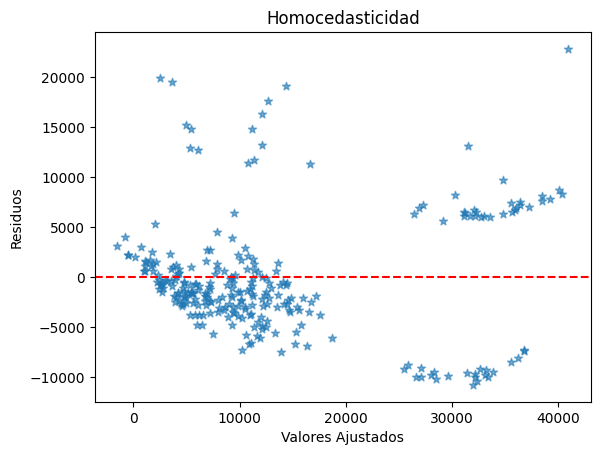

In [115]:
# Visualizar homocedasticidad 
plt.scatter(y_pred, error, marker='*', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Homocedasticidad')
plt.show()

In [116]:
# Forma Estadística de Homocedasticidad
#Breusch-Pagan
#H0: Homocedasticidad (p>0.05)
#H1: No homocedasticidad (p<0.05)
names=['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(modelo2.resid, X_train)
lzip(names, test)

[('Lagrange multiplier statistic', 87.93278134000774),
 ('p-value', 3.6184882952062385e-18),
 ('f-value', 23.839613609873197),
 ('f p-value', 6.595296705503492e-19)]

El parámetro de Breusch-Pagan nos indica si hay homocedasticidad, en este caso el p-value es de prácticamente 0 por lo que **no hay homocedasticidad**, es decir hay heterocedasticidad, lo podemos confirmar viendo la gráfica, ya que se ven como una especie de embudo

#### <font color= #8FBC8F> **Normalidad**</font>

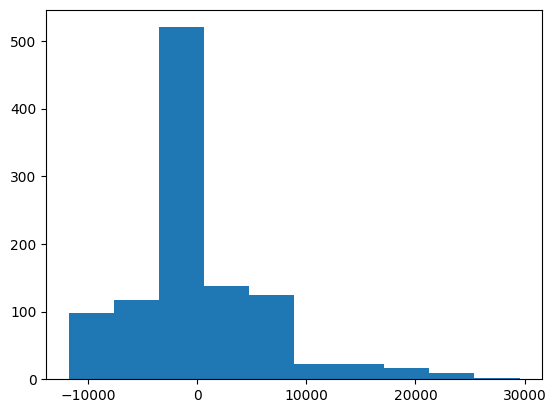

In [ ]:
# Forma gráfica de la  normalidad de los residuos
plt.figure()
plt.hist(modelo2.resid)
plt.show()

Text(0, 0.5, 'Cuantiles de los Residuos')

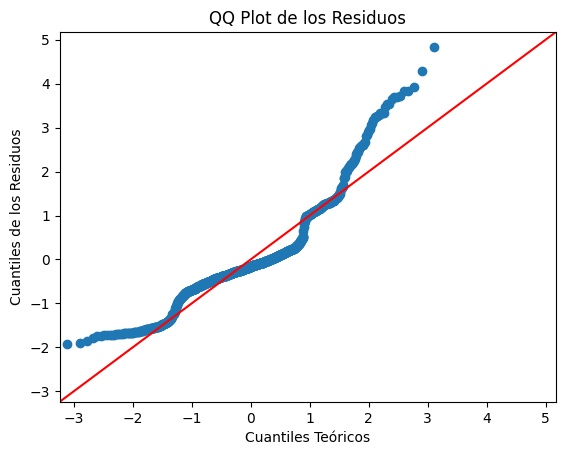

In [ ]:
#%% QQ plot

qq_plot = sm.qqplot(modelo2.resid, line='45', fit=True)

# Personalizar la apariencia del QQ plot
plt.title("QQ Plot de los Residuos")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de los Residuos")

In [ ]:
# Forma estadística de la normalidda (Shapiro-Wilk)
#Ho: Normalidad (p>0.05)
#H1: No normalidad (p<0.05)
names=[' Statistic', 'p-value']
test=stats.shapiro(modelo2.resid)
lzip(names,test)

[(' Statistic', 0.8949837361463181), ('p-value', 2.1492108508201836e-26)]

##### <font color= #FFD8A8> **Modelo 3: ANOVA** </font>

In [121]:
# Cargar los datos
df = pd.read_csv('medical_cost.csv')
df

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Seleccionar clases específicas para el ANOVA 
regiones = ['southwest', 'southeast', 'northwest', 'northeast']
df_filtered = df[df['region'].astype(str).isin(regiones)]

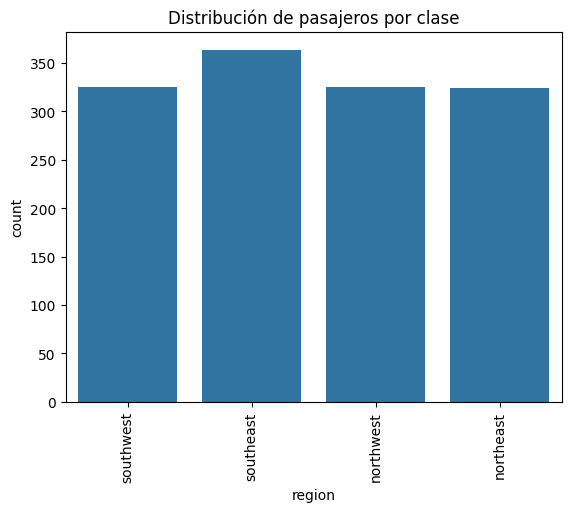

In [124]:
# Gráfico de conteo por clase
sns.countplot(data=df_filtered, x='region')
plt.xticks(rotation=90)
plt.title("Distribución de pasajeros por clase")
plt.show()

In [125]:
#%% Selección de muestra balanceada
sample_size = 200
sample_list = []

for cls in regiones:
    sample = df_filtered[df_filtered['region'] == cls].sample(sample_size, random_state=42)
    sample_list.append(sample)

sample = pd.concat(sample_list)


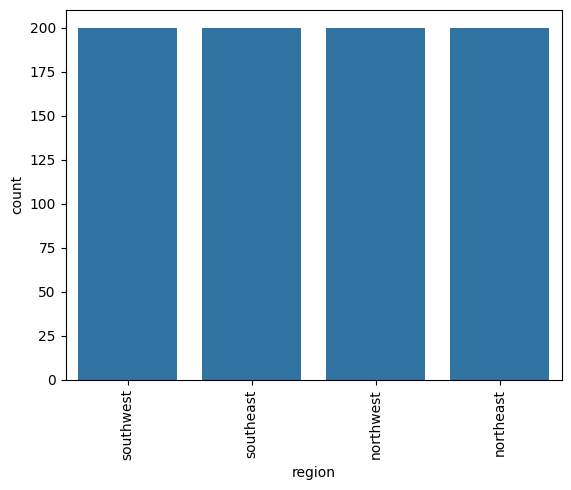

In [126]:
# Verificar distribución
sns.countplot(data=sample, x='region')
plt.xticks(rotation=90)
plt.show()

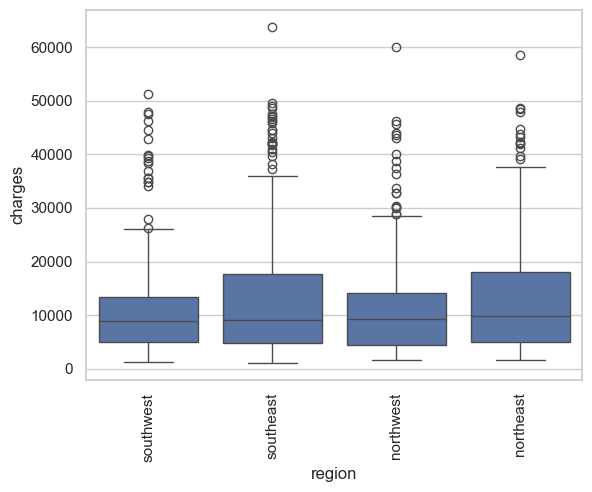

In [127]:
#BoxPlot
sns.set(style="whitegrid")
sns.boxplot(x='region', y='charges', data=sample)
plt.xticks(rotation=90)
plt.show()

##### <font color= #d4b1e6> **Verificación de supuestos** </font>

In [130]:
#%% Cumplimiento de supuestos
#Normalidad prueba de Shapiro-Wilk
#Ho:Normalidad(p>0.05)
#H1: No normalidad (p<0.05)
normality_test = pg.normality(sample, dv='charges', group='region')
print("Prueba de Normalidad (Shapiro-Wilk):\n", normality_test)

Prueba de Normalidad (Shapiro-Wilk):
                   W          pval  normal
region                                   
southwest  0.790959  1.237692e-15   False
southeast  0.790271  1.164675e-15   False
northwest  0.811898  8.465966e-15   False
northeast  0.833699  7.420494e-14   False


Como podemos ver, los residuos no son normales.

In [131]:
#%%Homocedasticidad prueba de Levene (sin normalidad)
#Ho:Homocedasticidad (p>0.05)
#H1: No Homocedasticidad (p<0.05)
pg.homoscedasticity(sample, dv='charges', 
                    group='region',method='levene')

,W,pval,equal_var
levene,2.591719,0.051649,True


In [133]:
#%%Homocedasticidad prueba de Bartlett (con normalidad)
#Ho:Homocedasticidad (p>0.05)
#H1: No Homocedasticidad (p<0.05)
pg.homoscedasticity(sample, dv='charges', 
                    group='region',method='bartlett')

,T,pval,equal_var
bartlett,17.744739,0.000497,False


In [134]:
#%% One way ANOVA
# Typ = 2 calcula las sumas de cuadrados de tipo II, que es apropiado para ANOVAs balanceados y desequilibrados
model =ols('charges ~ region', data=sample).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
print("\nTabla ANOVA:")
print(anova_table)


Tabla ANOVA:
                sum_sq     df         F    PR(>F)
region    7.863965e+08    3.0  1.926381  0.123788
Residual  1.083156e+11  796.0       NaN       NaN


Basándonos en el ANOVA podemos ver que **no** existe una diferencia significativa entre las diferentes regiones de los pacientes respecto al gasto médico.

In [135]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.926
Date:                Wed, 30 Apr 2025   Prob (F-statistic):              0.124
Time:                        11:49:42   Log-Likelihood:                -8624.6
No. Observations:                 800   AIC:                         1.726e+04
Df Residuals:                     796   BIC:                         1.728e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.376e+04    

In [136]:
#%%Comparación múltiple Prueba de Tukey
comp = mc.MultiComparison(sample['charges'],sample['region'])
post_hoc_res = comp.tukeyhsd()
print("\nComparaciones múltiples (Tukey):")
print(post_hoc_res.summary())


Comparaciones múltiples (Tukey):
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest -1808.4858 0.4079 -4811.6301 1194.6585  False
northeast southeast   161.3724 0.9991 -2841.7719 3164.5167  False
northeast southwest -1981.8197 0.3249  -4984.964 1021.3247  False
northwest southeast  1969.8582 0.3303 -1033.2861 4973.0025  False
northwest southwest  -173.3339 0.9988 -3176.4782 2829.8104  False
southeast southwest -2143.1921 0.2566 -5146.3364  859.9522  False
-----------------------------------------------------------------


El promedio de los costos médicos no cambia significativamente entre las diferentes regiones (northeast, northwest, southeast, southwest)

##### <font color= #FFD8A8> **Modelo 3: ANCOVA** </font>

##### <font color= #96d9cf> **ANCOVA con interacción covariable:factor**</font>

### <font color=  #c9d996> **Conclusiones**</font>

### <font color=  #c9d996> **Enlace datos**</font>

Enlace: https://www.kaggle.com/datasets/nanditapore/medical-cost-dataset